In [22]:
# import dependecies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#% matplotlib inline

In [31]:
# change path
path = "C:\\Users\\makbulhussain.k\\Downloads\\"
# load data
df = pd.read_csv(path + "HR_comma_sep.csv", encoding='utf-8')

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [32]:
# create dummy variables for the categorical features
sales_dummies = pd.get_dummies(df.sales, prefix="sales_").astype("int")
salary_dummies = pd.get_dummies(df.salary, prefix="salary_").astype("int")

# stack the individual dummy sets together
data = pd.concat([sales_dummies, salary_dummies, df.drop("left", axis=1)], axis=1).drop(["sales", "salary"], axis=1)
data = pd.concat([data, df.left], axis=1)
data.head()

,sales__IT,sales__RandD,sales__accounting,sales__hr,sales__management,sales__marketing,sales__product_mng,sales__sales,sales__support,sales__technical,...,salary__low,salary__medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0.38,0.53,2,157,3,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0.80,0.86,5,262,6,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0.11,0.88,7,272,4,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0.72,0.87,5,223,5,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0.37,0.52,2,159,3,0,0,1


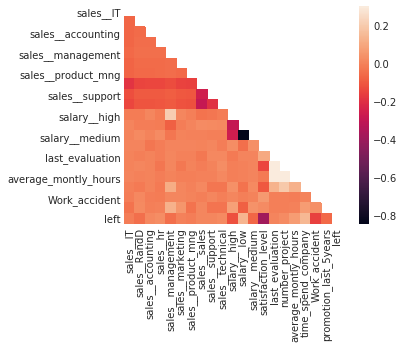

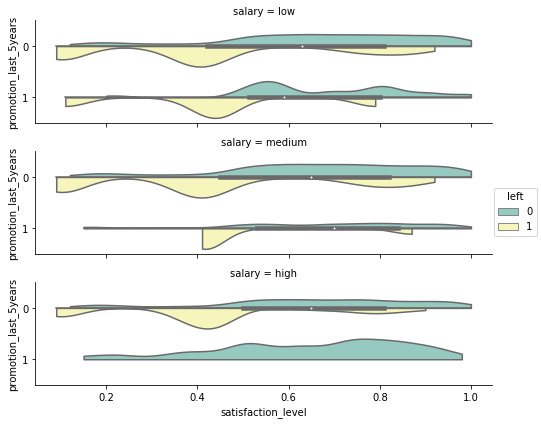

In [33]:
################### PLOTS
# Correlation Heatmap
cor = data.corr()
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(cor, mask=mask, vmax=.3, square=True)
plt.show()


# Factorplot
g = sns.factorplot(x="satisfaction_level", y="promotion_last_5years",
                   hue="left", row="salary",
                    data=df,
                    orient="h", size=2, aspect=3.5, palette="Set3",
                    kind="violin", split=True, cut=0, bw=.2)
plt.show()



# Save clean data set to csv
# data.to_csv("data_clean.csv", index=False, header=False)

In [37]:
# change path
path = "C:\\Users\\makbulhussain.k\\Downloads\\pandas_exercises-master\\06_Stats\\US_Baby_Names\\"
# load data
baby_names = pd.read_csv(path + "US_Baby_Names_right.csv")

baby_names.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [38]:
# deletes Unnamed: 0
del baby_names['Unnamed: 0']

# deletes Unnamed: 0
del baby_names['Id']

baby_names.head()



,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


In [39]:
#male or female names in the dataset?
baby_names['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

In [41]:
#Group the dataset by name and assign to names
# you don't want to sum the Year column, so you delete it
del baby_names["Year"]
# group the data
names = baby_names.groupby("Name").sum()

# print the first 5 observations
names.head()

# print the size of the dataset
print(names.shape)

# sort it from the biggest value to the smallest one
names.sort_values("Count", ascending = 0).head()

(17632, 1)


,Count
Name,
Jacob,242874
Emma,214852
Michael,214405
Ethan,209277
Isabella,204798


In [42]:
# as we have already grouped by the name, all the names are unique already. 
# get the length of names
len(names)

17632

In [43]:
#What is the name with most occurrences?
names.Count.idxmax()

# OR

# names[names.Count == names.Count.max()]

'Jacob'

In [44]:
#How many different names have the least occurrences?
len(names[names.Count == names.Count.min()])

2578

In [50]:
#What is the name with least occurrences?

names.Count.idxmin()

'Aadarsh'

In [51]:
# What is the median name occurrence?
names[names.Count == names.Count.median()]

,Count
Name,
Aishani,49
Alara,49
Alysse,49
Ameir,49
Anely,49
Antonina,49
Aveline,49
Aziah,49
Baily,49


In [52]:
#What is the standard deviation of names?
names.Count.std()

11006.069467891111

In [54]:
#Get a summary with the mean, min, max, std and quartiles.
names.describe()



,Count
count,17632.000000
mean,2008.932169
std,11006.069468
min,5.000000
25%,11.000000
50%,49.000000
75%,337.000000
max,242874.000000
